探索深度学习
===

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import colors
import os, copy
from PIL import Image

In [7]:
def init_normal(m):
    if type(m) == nn.Linear:        
        nn.init.normal_(m.weight)


class NN(nn.Module):

    def __init__(self, activation=nn.Tanh, num_neurons=16, num_layers=9):
        """
        num_layers must be at least two
        """
        super(NN, self).__init__()
        layers = [nn.Linear(2, num_neurons, bias=True), activation()]
        for _ in range(num_layers - 1):
            layers += [nn.Linear(num_neurons, num_neurons, bias=False), activation()]
        layers += [nn.Linear(num_neurons, 3, bias=False), nn.Sigmoid()]
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)


def gen_new_image(size_x, size_y, save=True, **kwargs):
    net = NN(**kwargs)
    net.apply(init_normal)
    colors = run_net(net, size_x, size_y)
    return net, colors


def run_net(net, size_x=128, size_y=128):
    x = np.arange(0, size_x, 1)
    y = np.arange(0, size_y, 1)
    colors = np.zeros((size_x, size_y, 2))
    for i in x:
        for j in y:
            colors[i][j] = np.array([float(i) / size_y - 0.5, float(j) / size_x - 0.5])
    colors = colors.reshape(size_x * size_y, 2)
    img = net(torch.tensor(colors).type(torch.FloatTensor)).detach().numpy()
    return img.reshape(size_x, size_y, 3)

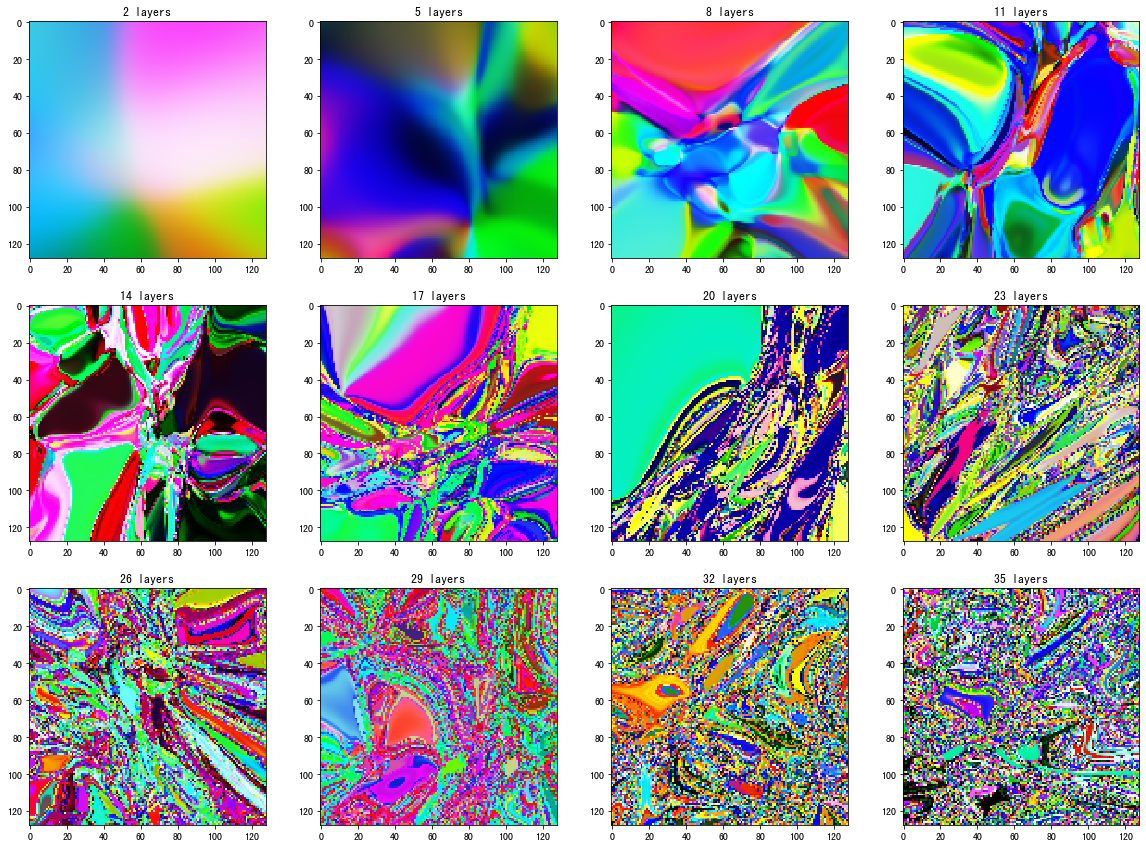

In [9]:
plt.figure(figsize=(20, 20))

for i, num_layers in enumerate(range(2, 36, 3)):
    n,c = gen_new_image(128, 128, save=False, num_layers=num_layers)
    plt.subplot(4, 4, i + 1)
    plt.title(f"{num_layers} layers")
    plt.imshow(c, interpolation='nearest', vmin=0, vmax=1)

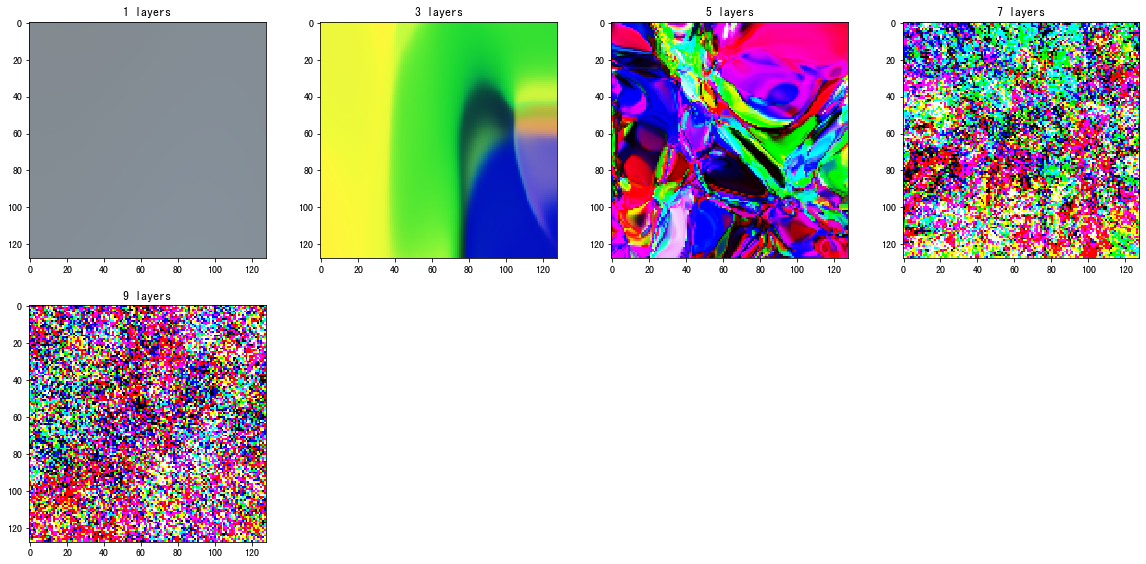

In [10]:
plt.figure(figsize=(20, 20))

for i, num_layers in enumerate(range(1, 10, 2)):
    n,c = gen_new_image(128, 128, save=False, num_neurons=2 ** num_layers)
    plt.subplot(4, 4, i + 1)
    plt.title(f"{num_layers} layers")
    plt.imshow(c, interpolation='nearest', vmin=0, vmax=1)

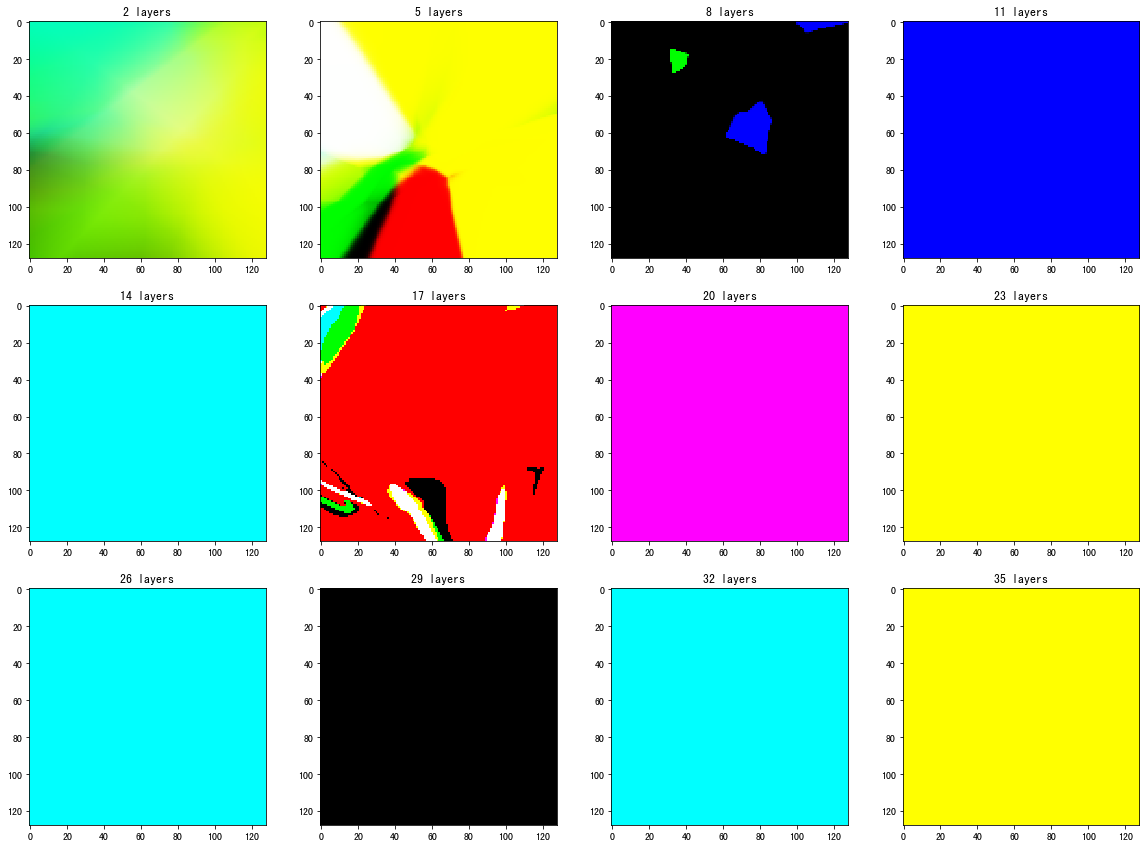

In [20]:
plt.figure(figsize=(20, 20))

for i, num_layers in enumerate(range(2, 36, 3)):
    n,c = gen_new_image(128, 128, save=False, num_layers=num_layers, activation=nn.ReLU)
    plt.subplot(4, 4, i + 1)
    plt.title(f"{num_layers} layers")
    plt.imshow(c, interpolation='nearest', vmin=0, vmax=1)